In [6]:
# ASTR 400 B 
# In Class Lab 2

# Import Modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+(2009 MNRAS 397, 868),  for Field Galaxies in SDSS + UKIRT at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to se $h$=1 here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [52]:
def schechter_M(m, phi_star=0.0166, m_star=-23.19, alpha=-0.81):
    """Function that computes the Schechter Luminosity Function 
    for a given magnitude, assuming default parameters for field 
    galaxies in SDSS at z~0.1 in the Kband (Smith+2009).

    Inputs:
        m : array-like
            An array of K-band magnitudes (assumes -5*log(h) implicitly).
        phi_star : float
            Normalization of Schechter function (h^3 Mpc^-3).
        m_star : float 
            Knee of the Schechter function (K-band magnitude, 
            assumes -5*log(h) implicitly).
        alpha : float
            Faint-end slope of the Schechter function.

    Output:
        schechterM : array-like
            Number density of galaxies (comoving units) 
            at the given magnitude m - 5*log(h).
    """
    # Grouping all constants together
    a = 0.4 * np.log(10) * phi_star
    
    # Power-law term controlling the faint-end slope
    b = 10**(0.4 * (m_star - m) * (alpha + 1.0)) 
    
    # Exponential term controlling the high-mass end behavior
    c = np.exp(-10**(0.4 * (m_star - m))) 
    
    return a * b * c

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [25]:
# Create an array to store Kband Magnitudes from -26 to -17
mk =np.arange(-26,-16.99,0.1)
print(mk)

[-26.  -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 -25.  -24.9
 -24.8 -24.7 -24.6 -24.5 -24.4 -24.3 -24.2 -24.1 -24.  -23.9 -23.8 -23.7
 -23.6 -23.5 -23.4 -23.3 -23.2 -23.1 -23.  -22.9 -22.8 -22.7 -22.6 -22.5
 -22.4 -22.3 -22.2 -22.1 -22.  -21.9 -21.8 -21.7 -21.6 -21.5 -21.4 -21.3
 -21.2 -21.1 -21.  -20.9 -20.8 -20.7 -20.6 -20.5 -20.4 -20.3 -20.2 -20.1
 -20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -19.  -18.9
 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7
 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1 -17. ]


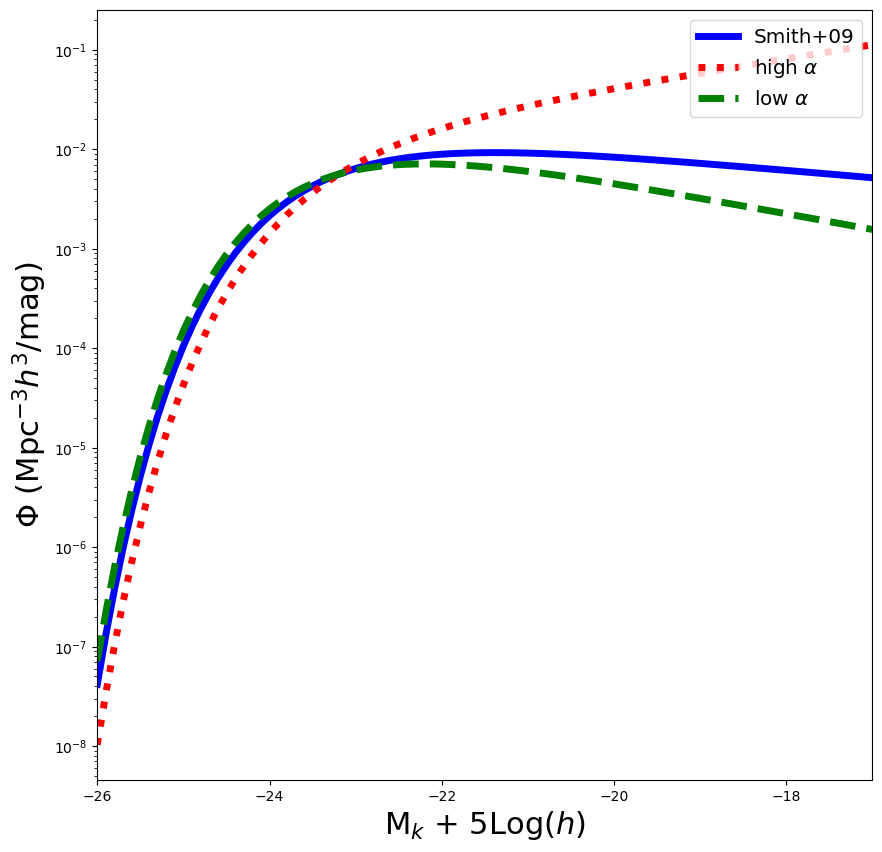

In [27]:
# Plot the Schechter Function
fig = plt.figure(figsize=(10,10))  
ax = plt.subplot(111) 


# Plot the default values (y-axis log scale)
ax.semilogy(mk, schechter_M(mk), color = 'blue', linewidth = 5, label = 'Smith+09')

# Change alpha
ax.semilogy(mk, schechter_M(mk, alpha = - 1.35), color = 'red', linewidth = 5, linestyle = ':', label = r'high $\alpha$')

ax.semilogy(mk, schechter_M(mk, alpha = - 0.6), color = 'green', linewidth = 5, linestyle = '--', label = r'low $\alpha$')

# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

# Set axis limits
plt.xlim(-26, -17)

# Adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add a legend with some customizations
legend= ax.legend(loc='upper right', fontsize='x-large')

# Save to a file
plt.savefig('Schechter_M.png')

# Show the plot
plt.show()

# Q3

Build a function to compute the Schechter Function in terms of luminosity.

Use `quad` to numerically integrate the function to compute the fraction of the luminosity that lies above L* in the following three cases:  

$\alpha$=-0.7 (default), $\alpha$=-0.6, $\alpha$=1.85. 


Schechter Function $\Phi(L) = \frac{n_\ast}{L_\ast} (\frac{L}{L_\ast})  ^{\alpha}  e^{-L/L_\ast}$

$n_\ast$ = 0.008  $h^3$ Mpc$^{-3}$

$L_\star = 1.4 \times 10^{10} L_\odot$

In [29]:

def schechter_L(lum, n_star=8e-3, l_star=1.4e10, alpha=-0.7):
    """ 
    Function that computes the Schechter Luminosity Function 
    for a given luminosity. Defaults are from Sparke & Gallagher.
    
    The function is given by:
        Φ(L) = (n_*/L_*) * (L/L_*)^α * exp(-L/L_*)
    
    Inputs:
    -------
        lum : float or array of floats
            Luminosity in units of L_sun.

        n_star : float, optional
            Normalization factor of the Schechter function (h^3 Mpc^-3). 

        l_star : float, optional
            Characteristic luminosity (L_sun). 

        alpha : float, optional
            Faint-end slope of the luminosity function.

    Outputs:
    --------
        schechterL : float
            Number density of galaxies for a given luminosity.
    """
    a = n_star / l_star   # Normalization constant
    b = np.exp(-lum / l_star)  # Exponential cutoff for the bright end
    c = (lum / l_star) ** alpha  # Power-law behavior for the faint end

    return a * b * c  # Final Schechter function value

def luminosity_fraction(alpha, n_star=8e-3, l_star=1.4e10):
    """
    Function that computes the fraction of total luminosity 
    that comes from galaxies with luminosities greater than L_*.
    
    Inputs:
    -------
        alpha : float
            Faint-end slope of the luminosity function.

    Outputs:
    --------
        frac : float
            Fraction of the total luminosity density above L*.
    """
    L_min = max(1e-3 * l_star, 1e6)  # Prevents divergence at L=0
    L_max = 100 * l_star  # Practical upper bound to avoid slow convergence
    
    # Integrate L * Φ(L) from L* to L_max
    integral, _ = quad(lambda L: L * schechter_L(L, n_star, l_star, alpha), l_star, L_max)
    
    # Integrate L * Φ(L) from L_min to L_max (total luminosity density)
    total_integral, _ = quad(lambda L: L * schechter_L(L, n_star, l_star, alpha), L_min, L_max)
    
    return integral / total_integral  # Fraction of luminosity above L*

# Compute and print results for different alpha values
alphas = [-0.7, -0.6, 1.85]
fractions = {alpha: luminosity_fraction(alpha) for alpha in alphas}

print(f"Fraction of luminosity above L* for different α values:")
for alpha, fraction in fractions.items():
    print(f"α = {alpha}: {fraction:.4f}")


Fraction of luminosity above L* for different α values:
α = -0.7: 0.4943
α = -0.6: 0.5341
α = 1.85: 0.9761


In [31]:
# Understanding lambda functions
# Short cut -- defines and evaluates a function in one line ! 

# lambda says that a function follows, where the variables are a and b, 
# and the function to be evaluated is a*b
x = lambda a, b : a * b
print(x(5, 6))

30


In [33]:
# Example Usage of quad and lambda

# Version 1
print(quad(np.sin, 0, np.pi))

# Version 2
f = lambda x: np.sin(x)
print(quad(f, 0, np.pi))

# Version 3
def ex(x):
    return np.sin(x) 

print(quad(lambda x: ex(x), 0, np.pi))

# Useful for numerical integration
# First number is the integrated value, second is the error. 



(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)


## Part B: IMF 

Create a function called `imf` that defines the IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}


where the default is the Salpeter IMF $\alpha = 2.35$ 

The function should take as input an array of stellar masses, M, and a minimum and maximum mass interval. 

You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from m_min= 0.1 to m_max = 120 M$_\odot$
and setting the result to 1.  

The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration:

`quad(lambda x:  fxn(x),xmin,xmax)`

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [35]:
def imf(m, m_min=0.1, m_max=120, alpha=2.35):
    
    ''' Function that defines the IMF (default is Salpeter). 
        The function is normalized such that 
        it returns the fraction of stars within some mass 
        interval m_min to m_max.

        Inputs:
            m: array of floats 
                Array of stellar masses (Msun)
            m_min:  float
                minimum mass (Msun)
            m_max : float
                maximal mass (Msun)
            alpha : float
                power law. default is the Salpeter IMF
                
        Output:
            norm_imf: float
                normalized fraction of stars at a given m
    '''
    # Determine the normalization for the imf
    to_normalize = quad(lambda m: m ** (-alpha), m_min, m_max)

    # Normalization factor
    norm = 1/to_normalize[0]

    # Define the normalized imf
    norm_imf = norm * m ** (-alpha)
    
    return norm_imf

## Q1: 
Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [37]:
test = quad(lambda m: imf(m), 0.1,120)
print(np.round(test[0],3))

1.0


## Q2: 
Integrate your normalized function to compute the fractional number of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

In [41]:
frac = quad(lambda m: imf(m), 1, 120)
print(np.round(frac[0], 3))

0.045


## Q3:

How might you modify the above to return the fraction of MASS in stars from 0.1Msun to 120 Msun ? instead of fraction of the total numbers of stars.

In [45]:
import numpy as np
from scipy.integrate import quad

def imf_mass(m, m_min=0.1, m_max=120, alpha=2.35):
    """ 
    Computes the Initial Mass Function (IMF), normalized to represent 
    the fraction of stellar mass within a specified mass range. 
    The default implementation follows the Salpeter IMF.

    The IMF follows a power-law distribution:
    
        ξ(m) ∝ m^(-α)

    where α is the power-law exponent.

    Parameters
    ----------
    m : float or array-like
        Stellar mass(es) in solar masses (M_sun).
    
    m_min : float, optional
        Minimum stellar mass considered in the IMF (default: 0.1 M_sun).
    
    m_max : float, optional
        Maximum stellar mass considered in the IMF (default: 120 M_sun).
    
    alpha : float, optional
        Power-law exponent that defines the slope of the IMF 
        (default: 2.35, corresponding to the Salpeter IMF).

    Returns
    -------
    norm_imf_mass : float or array-like
        Normalized fraction of mass contributed by stars of a given mass, 
        ensuring that the total mass fraction over the range [m_min, m_max] is unity.
    """
    
    # Compute the normalization constant by integrating over the full mass range
    normalization, _ = quad(lambda m: m * m**(-alpha), m_min, m_max)
    
    # Apply the normalization factor to the IMF function
    norm_imf_mass = (1 / normalization) * m * m**(-alpha)
    
    return norm_imf_mass

# Compute the fraction of total stellar mass in stars more massive than the Sun (M > 1 M_sun)
frac_massive_stars, _ = quad(lambda m: imf_mass(m), 1, 120)

# Print the result rounded to three decimal places
print(np.round(frac_massive_stars, 3))


0.396


In [50]:
# Compute the total mass in stars with masses between 1 M_sun and 120 M_sun
# for a star cluster of 7000 M_sun.
cluster_mass = 7000  # Total mass of the cluster in solar masses
mass_fraction = np.round(frac_massive_stars, 3)  # Fraction of mass in stars > 1 M_sun

# Compute the mass contribution from stars in the given range
mass_in_massive_stars = cluster_mass * mass_fraction

# Print the result
print(mass_in_massive_stars)


2772.0
